In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
fms = pd.read_csv('../data/FMS.csv')
fms.head()

,position,MC,BG,BGR,BPR,BP,PTS,PTB,year,country,champion
0,1,Meta,4,1,0,0,14,534.0,2023A,CAR,False
1,1,Letra,4,1,0,0,14,882.5,2023B,CAR,True
2,3,Aldair,3,0,1,1,10,513.5,2023A,CAR,False
3,2,SNK,2,1,2,2,10,508.5,2023A,CAR,False
4,2,Ritmodelia,3,0,1,1,10,844.0,2023B,CAR,False


In [5]:
fms.describe()

,position,BG,BGR,BPR,BP,PTS,PTB
count,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000
mean,5.152174,2.677536,1.514493,1.648551,2.402174,12.409420,2163.878623
std,2.995517,1.909118,1.319700,1.575851,1.825435,6.286706,949.221393
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,325.500000
25%,3.000000,1.000000,0.000000,0.000000,1.000000,8.000000,871.125000
50%,5.000000,2.000000,1.000000,1.000000,2.000000,12.000000,2613.500000
75%,7.000000,4.000000,2.000000,3.000000,4.000000,16.000000,2879.500000
max,12.000000,9.000000,6.000000,7.000000,9.000000,30.000000,3546.000000


In [6]:
fms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   position  276 non-null    int64  
 1   MC        276 non-null    object 
 2   BG        276 non-null    int64  
 3   BGR       276 non-null    int64  
 4   BPR       276 non-null    int64  
 5   BP        276 non-null    int64  
 6   PTS       276 non-null    int64  
 7   PTB       276 non-null    float64
 8   year      276 non-null    object 
 9   country   276 non-null    object 
 10  champion  276 non-null    bool   
dtypes: bool(1), float64(1), int64(6), object(3)
memory usage: 22.0+ KB


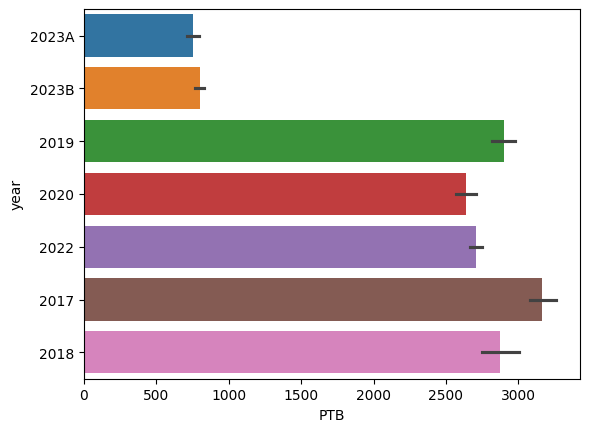

In [7]:
mean_fms = fms.groupby('year').mean("PTB")
sns.barplot(y="year", x="PTB",hue="year", data=fms)
plt.show()

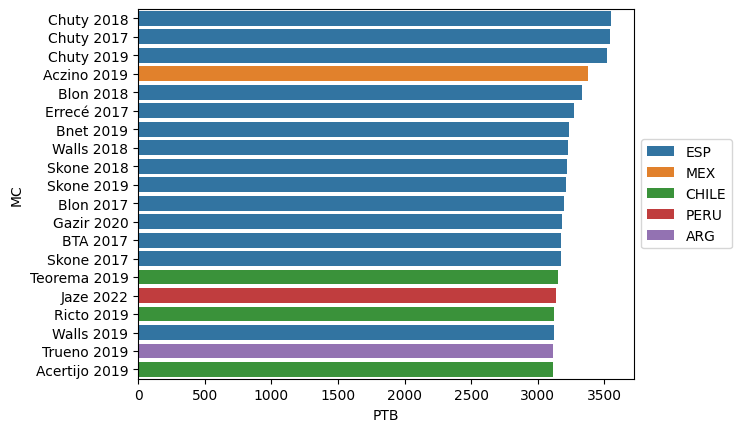

In [8]:
top_10_PTB = fms.sort_values("PTB",ascending=False).head(20)
top_10_PTB["MC"] = top_10_PTB["MC"] + " " + top_10_PTB["year"]
sns.barplot(y="MC", x="PTB",hue="country", data=top_10_PTB)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [9]:
fms.sort_values("PTB",ascending=False).head(20)

,position,MC,BG,BGR,BPR,BP,PTS,PTB,year,country,champion
66,1,Chuty,7,1,1,0,24,3546.0,2018,ESP,True
56,1,Chuty,8,1,0,0,26,3544.0,2017,ESP,True
76,1,Chuty,8,0,1,0,25,3523.0,2019,ESP,True
174,1,Aczino,9,0,0,0,27,3374.0,2019,MEX,True
69,4,Blon,3,2,2,2,14,3333.0,2018,ESP,False
60,5,Errecé,3,1,2,3,13,3273.0,2017,ESP,False
78,3,Bnet,6,0,1,2,19,3233.0,2019,ESP,False
67,2,Walls,5,0,2,1,18,3226.0,2018,ESP,False
68,3,Skone,3,3,1,2,16,3220.0,2018,ESP,False
77,2,Skone,5,3,0,1,21,3215.0,2019,ESP,False


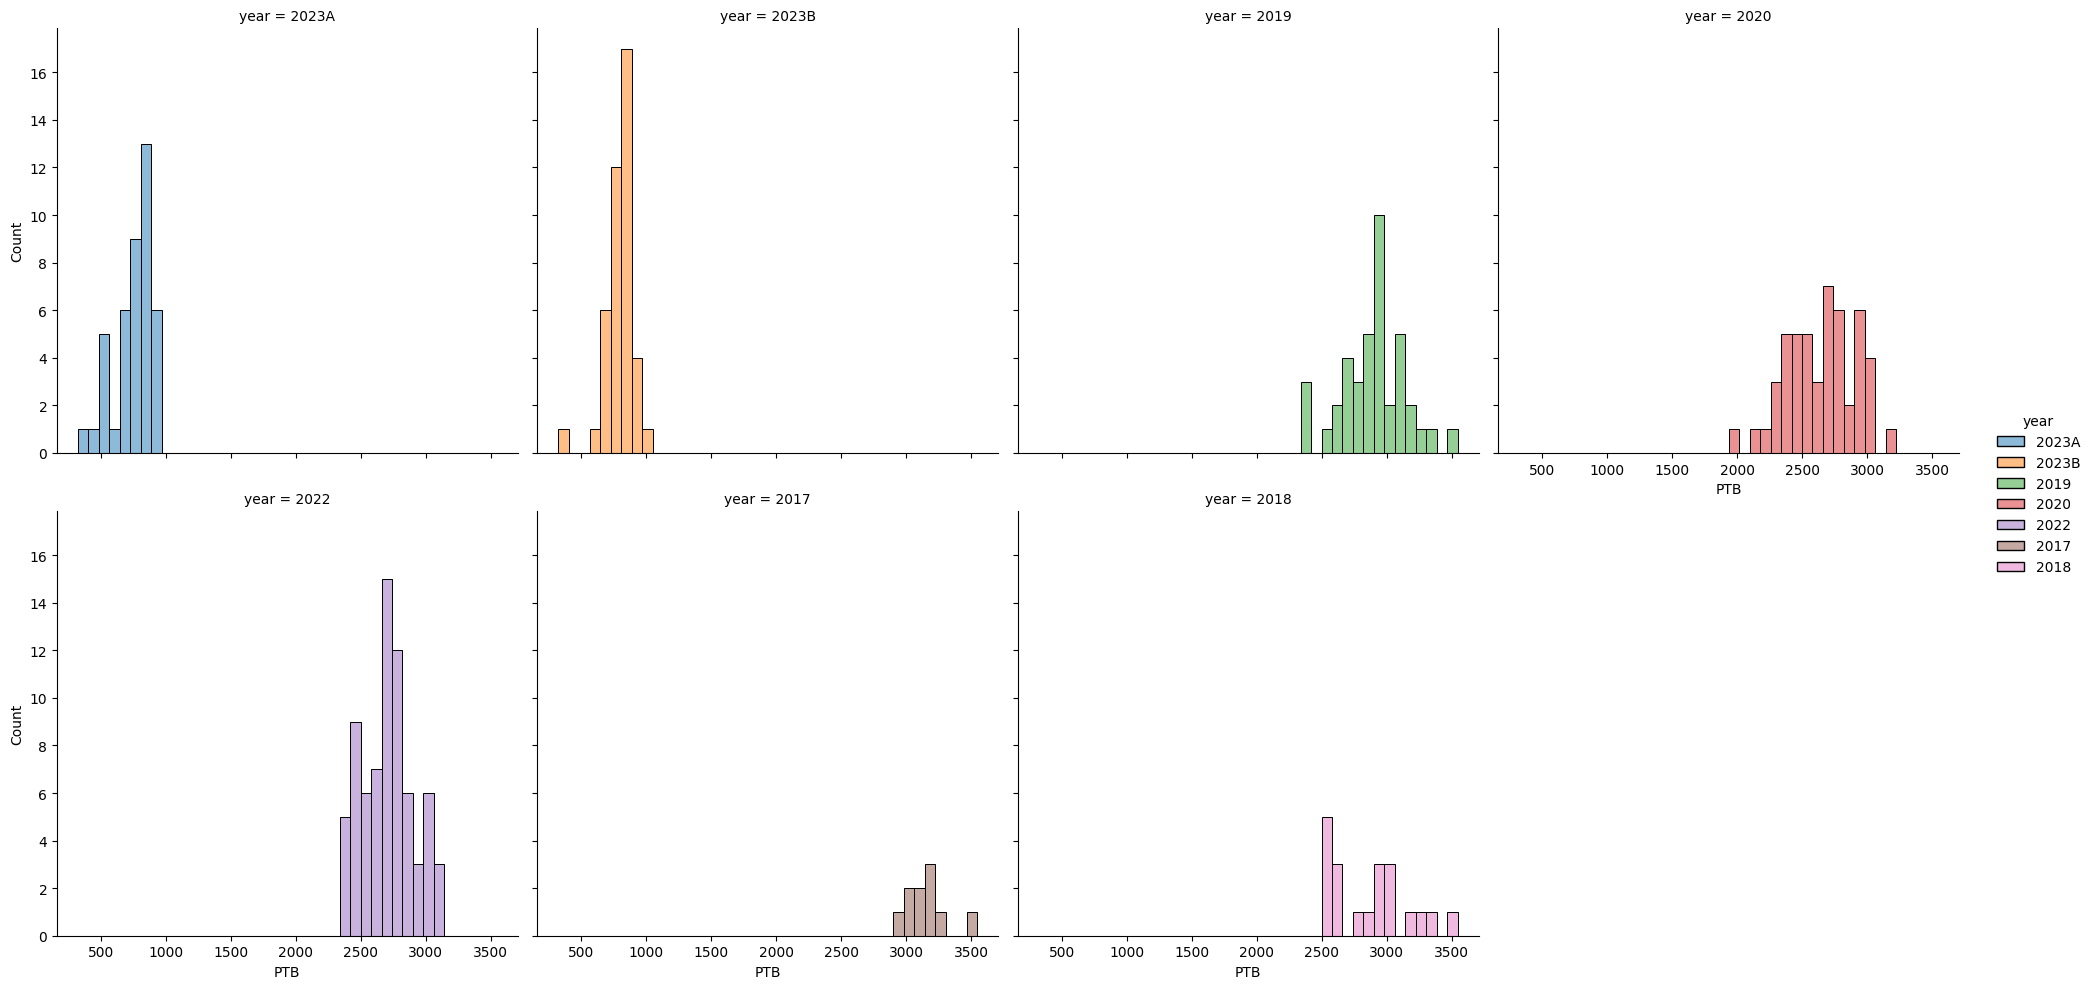

In [10]:
sns.displot(fms, x="PTB", hue="year", kind="hist", fill=True, col="year", col_wrap=4, bins=40)
plt.show()

In [11]:
import scipy.stats as stats

for year in fms["year"].unique():
    result = stats.anderson(fms[fms["year"] == year]["PTB"])
    print(f'Año: {year}')
    print("Es normal la distribución" if result.statistic < result.critical_values[2] else "No es normal la distribución")
    print()

Año: 2023A
No es normal la distribución

Año: 2023B
No es normal la distribución

Año: 2019
Es normal la distribución

Año: 2020
Es normal la distribución

Año: 2022
Es normal la distribución

Año: 2017
Es normal la distribución

Año: 2018
Es normal la distribución



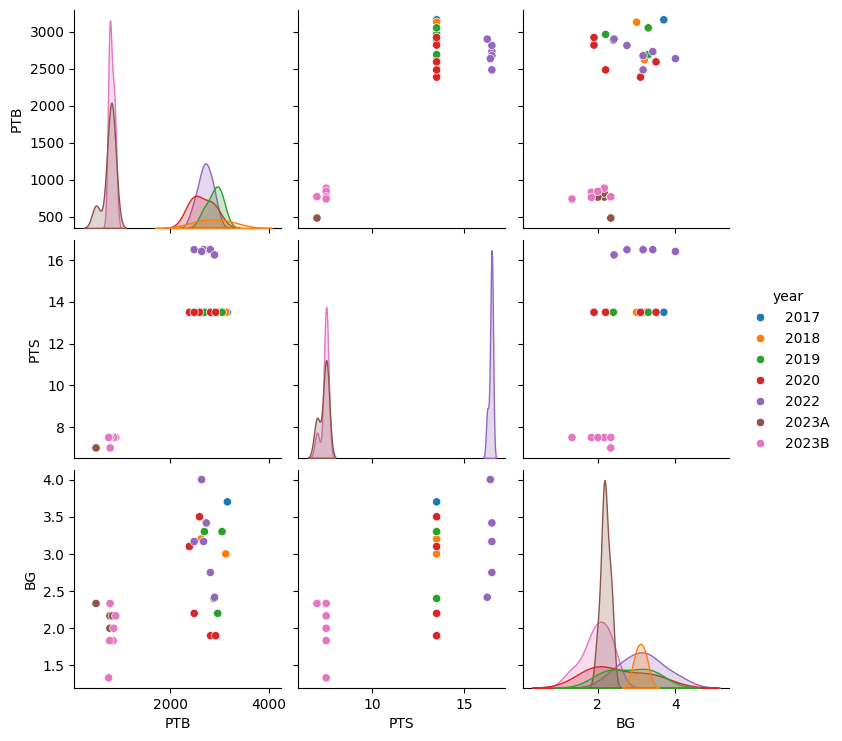

In [12]:
stats = fms.groupby(["year","country"]).agg({
    "PTB": "mean",
    "PTS": "mean",
    "BG": "mean"
})

sns.pairplot(stats.reset_index(), hue="year")

In [13]:
# Escalar manualmente por año
def scale_group(group, method="standard"):
    # Crear una copia del grupo para evitar modificar el original
    scaled_group = group.copy()
    
    # Seleccionar solo las columnas numéricas
    numeric_cols = ['PTB', 'BG', 'PTS']
    
    for col in numeric_cols:
        if method == "standard":
            # Escalado estándar: (x - mean) / std
            mean = group[col].mean()
            std = group[col].std()
            scaled_group[f"{col}_scaled"] = (group[col] - mean) / std
        elif method == "minmax":
            # Escalado Min-Max: (x - min) / (max - min)
            min_val = group[col].min()
            max_val = group[col].max()
            scaled_group[f"{col}_scaled"] = (group[col] - min_val) / (max_val - min_val)
    return scaled_group

# Aplicar el escalado a cada grupo
fms_scaled = fms.groupby('year', group_keys=False).apply(scale_group, method="standard")

C:\Users\Ari Castillo\AppData\Local\Temp\ipykernel_14988\3912353302.py:23: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  fms_scaled = fms.groupby('year', group_keys=False).apply(scale_group, method="standard")


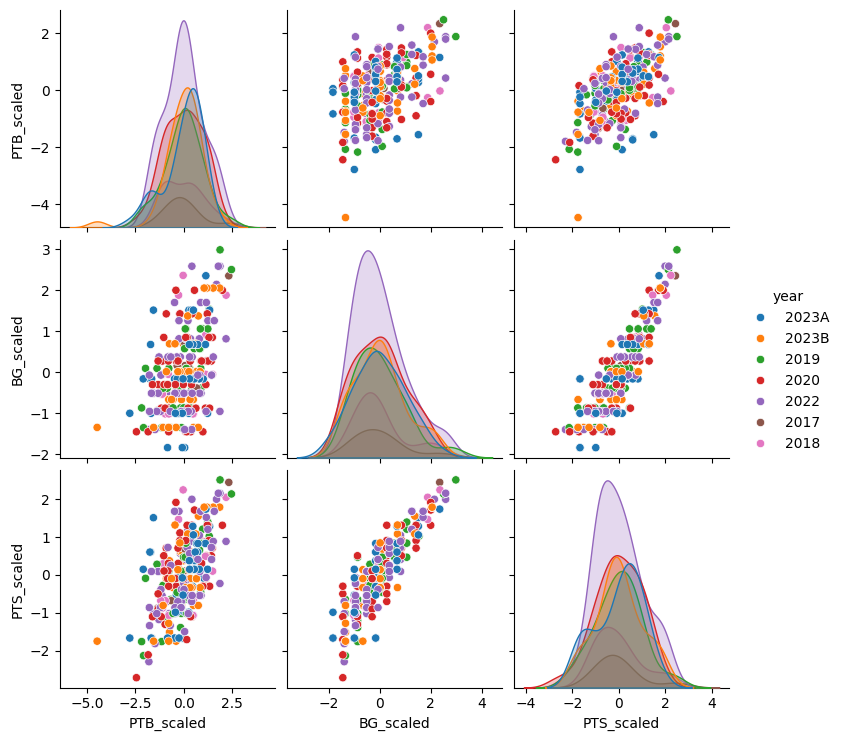

In [14]:
sns.pairplot(fms_scaled, hue="year", vars=["PTB_scaled", "BG_scaled", "PTS_scaled"])
plt.show()

In [15]:
import numpy as np
import pandas as pd

n_boots = 1000
bootstrap_means = {"2017": [], "2018": [], "2019": [], "2020": [], "2022": [], "2023": []}

# Generar las muestras bootstrap por año
for _ in range(n_boots):
    for key in bootstrap_means.keys():
        if key == "2023":
            year_data = fms.query("year == '2023A' or year == '2023B'")["PTB"]
        else:
            year_data = fms.query(f"year == '{key}'")["PTB"]
        size = len(year_data)  # Usar tamaño de datos por año
        bootstrap_sample = np.random.choice(year_data, size=size, replace=True)
        bootstrap_mean = np.mean(bootstrap_sample)
        bootstrap_means[key].append(bootstrap_mean)

# Convertir los resultados a un DataFrame
bootstrap_means_df = pd.DataFrame(bootstrap_means)

# Mostrar los primeros registros
print(bootstrap_means_df.head())


     2017     2018      2019     2020         2022        2023
0  3101.6  3006.80  2928.575  2614.49  2719.715278  778.261905
1  3174.5  2898.15  2951.775  2638.92  2692.041667  777.101190
2  3190.7  2913.70  2851.425  2688.79  2721.520833  767.273810
3  3208.5  2785.60  2908.125  2595.02  2712.979167  749.934524
4  3180.2  2844.90  2960.350  2657.75  2699.000000  766.809524


In [16]:
import scipy.stats as stats

cis = {}
anderson = {}
for column in bootstrap_means_df.columns:
    anderson[column] = stats.anderson(bootstrap_means_df[column])
    cis[column] = np.percentile(bootstrap_means_df[column], [0.5, 99.5])

    result = anderson[column]
    ci = cis[column]

    print(f'Año: {column}')
    print("Es normal la distribución\n" if result.statistic < result.critical_values[2] else "NO es normal la distribución\n")

Año: 2017
NO es normal la distribución

Año: 2018
NO es normal la distribución

Año: 2019
Es normal la distribución

Año: 2020
Es normal la distribución

Año: 2022
Es normal la distribución

Año: 2023
NO es normal la distribución



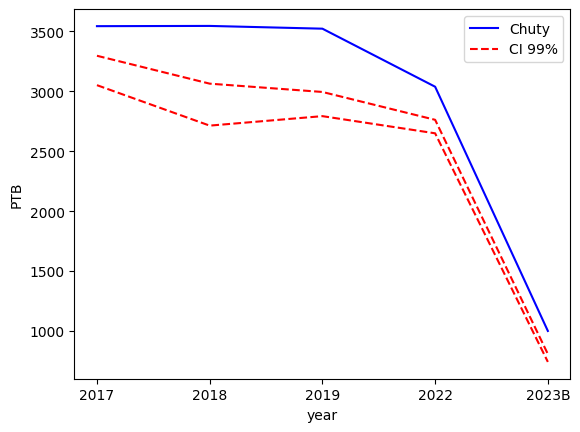

In [17]:
chuty_performance = fms.query("MC == 'Chuty'")[["year", "PTB"]]
for i, row in chuty_performance.iterrows():
    if row["year"] == "2023A" or row["year"] == "2023B":
        row["year"] = "2023"
    chuty_performance.loc[i, "upper"] = cis[row["year"]][1]
    chuty_performance.loc[i, "lower"] = cis[row["year"]][0]

sns.lineplot(data=chuty_performance, x="year", y="PTB", color="blue", label="Chuty")
sns.lineplot(data=chuty_performance, x="year", y="upper", color="red", linestyle="--", label="CI 99%")
sns.lineplot(data=chuty_performance, x="year", y="lower", color="red", linestyle="--")
plt.show()

Que duro es chuty loco

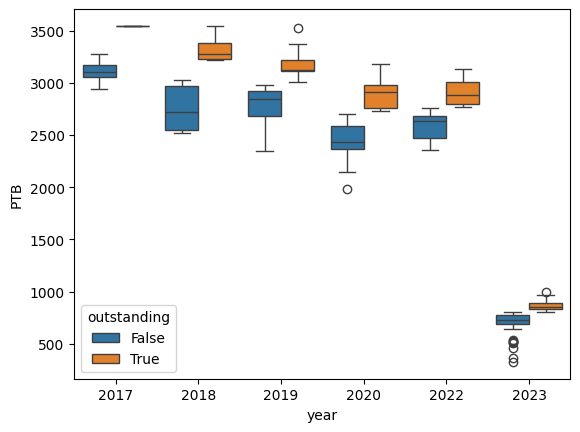

In [18]:
fixed_fms = fms.copy()
fixed_fms["year"] = fixed_fms["year"].replace({"2023A": "2023", "2023B": "2023"})

for year in fixed_fms["year"].unique():
    fixed_fms.loc[fixed_fms["year"] == year, "upper"] = cis[year][1]
    fixed_fms.loc[fixed_fms["year"] == year, "lower"] = cis[year][0]

fixed_fms["outstanding"] = (fixed_fms["PTB"] > fixed_fms["upper"])
fixed_fms = fixed_fms.sort_values("year")
sns.boxplot(data=fixed_fms, x="year", y="PTB", hue="outstanding")
plt.show()

In [19]:
fixed_fms.query("outstanding == True and year == '2018'")
        

,position,MC,BG,BGR,BPR,BP,PTS,PTB,year,country,champion,upper,lower,outstanding
69,4,Blon,3,2,2,2,14,3333.0,2018,ESP,False,3064.15425,2713.8475,True
68,3,Skone,3,3,1,2,16,3220.0,2018,ESP,False,3064.15425,2713.8475,True
67,2,Walls,5,0,2,1,18,3226.0,2018,ESP,False,3064.15425,2713.8475,True
66,1,Chuty,7,1,1,0,24,3546.0,2018,ESP,True,3064.15425,2713.8475,True


In [20]:
fixed_fms.groupby(["champion", "outstanding"]).size()

champion  outstanding
False     False          166
          True            84
True      False            5
          True            21
dtype: int64

In [21]:
 fms = pd.read_csv('../data/FMS.csv')

In [22]:
fms["year"] = fms["year"].replace({"2023A": "2023", "2023B": "2023"})

<Axes: xlabel='year', ylabel='PTB'>

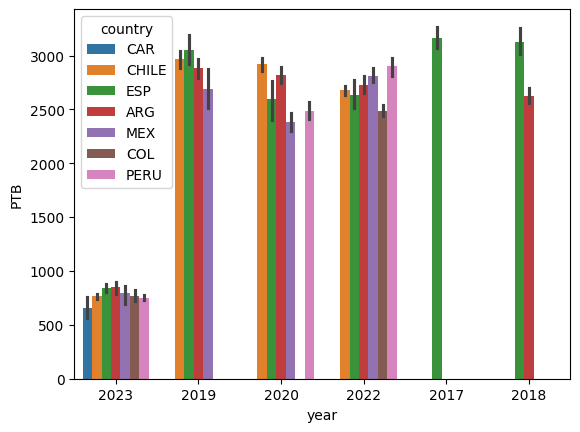

In [23]:
x = fms.query("year != '2023A' or country != 'COL'")
sns.barplot(x="year", y="PTB", data=x, hue="country")

In [24]:
fms_scaled.sample(5)

,position,MC,BG,BGR,BPR,BP,PTS,PTB,year,country,champion,PTB_scaled,BG_scaled,PTS_scaled
236,4,Coloso,2,0,1,2,7,706.5,2023A,COL,False,-0.330467,-0.159494,-0.080971
196,3,Skiper,5,2,4,0,23,2865.5,2022,MEX,False,0.815347,0.816590,1.040234
111,3,Mnak,3,0,0,2,9,839.5,2023A,ESP,False,0.618383,0.677848,0.372467
18,7,Pepe Grillo,2,2,2,3,12,2804.0,2019,CHILE,False,-0.372484,-0.384992,-0.278174
248,7,New Era,2,2,3,2,13,2419.5,2020,PERU,False,-0.825969,-0.298722,-0.100514


In [51]:
def is_normal(data):
    result = stats.anderson(data)
    for i in range(len(result.critical_values)):
        sl, cv = result.significance_level[i], result.critical_values[i]
        if result.statistic < result.critical_values[i]:
            print(f'{int(sl)}%: {cv}, data looks normal (fail to reject H0)')
        else:
            print(f'{int(sl)}%: {cv}, data does not looks normal (reject H0)')

is_normal(fms_scaled["PTB_scaled"])

15%: 0.568, data looks normal (fail to reject H0)
10%: 0.647, data looks normal (fail to reject H0)
5%: 0.776, data looks normal (fail to reject H0)
2%: 0.905, data looks normal (fail to reject H0)
1%: 1.077, data looks normal (fail to reject H0)


In [82]:
def normality_df(data):
    result = stats.anderson(data)
    normality = pd.DataFrame({
        "significance_level": [str(int(sl)) + "%" for sl in result.significance_level],
        "critical_value": result.critical_values
    })
    
    normality["is_normal"] = result.statistic < normality["critical_value"]
    return normality

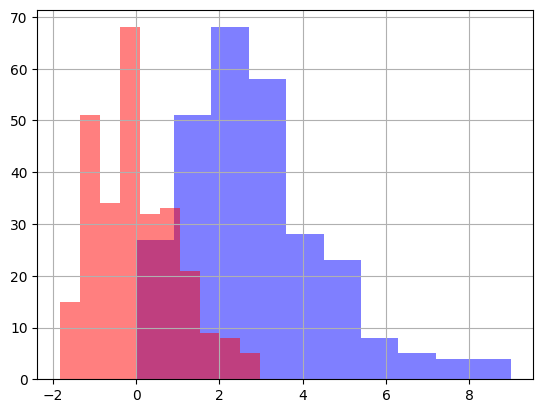

La columna BG escalada NO sigue una distribución normal
La columna BG NO sigue una distribución normal


In [43]:
fms_scaled["BG"].hist(alpha=0.5, color="blue")
fms_scaled["BG_scaled"].hist(alpha=0.5, color="red")
plt.show()

bg_scaled_result = stats.anderson(fms_scaled["BG_scaled"])
bg_result = stats.anderson(fms["BG"])

if bg_scaled_result.statistic < bg_scaled_result.critical_values[2]:
    print("La columna BG escalada sigue una distribución normal")
else:
    print("La columna BG escalada NO sigue una distribución normal")

if bg_result.statistic < bg_result.critical_values[2]:
    print("La columna BG sigue una distribución normal")
else:
    print("La columna BG NO sigue una distribución normal")

Columna: position


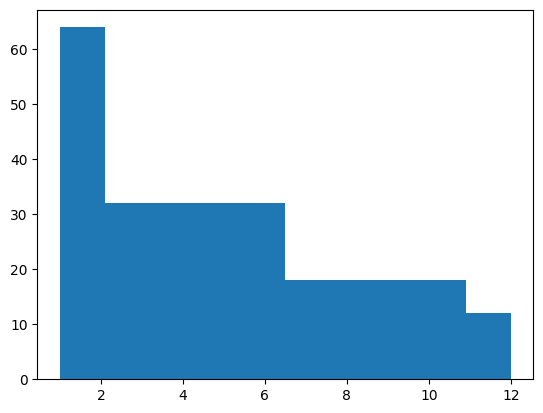

Columna: BG


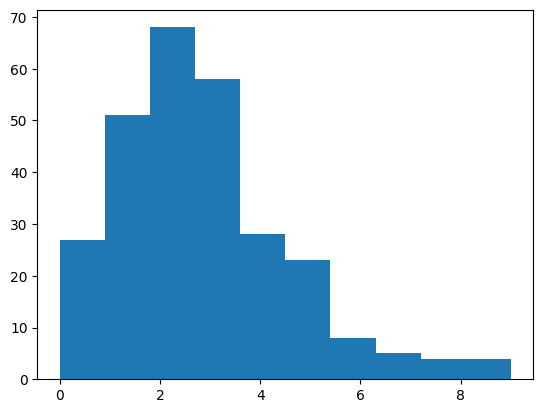

Columna: BGR


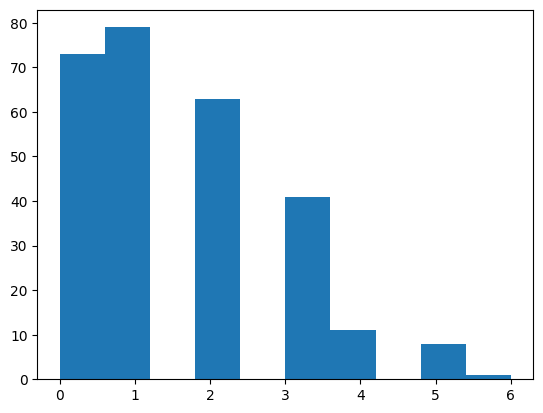

Columna: BPR


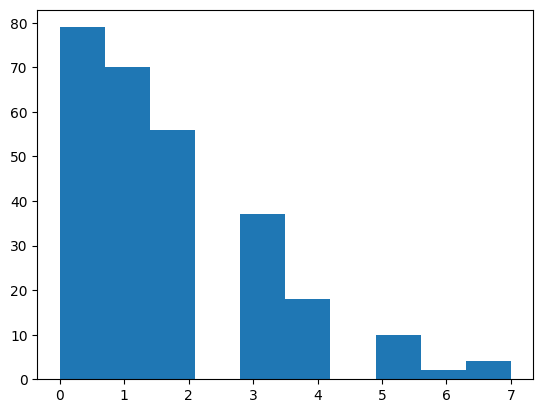

Columna: BP


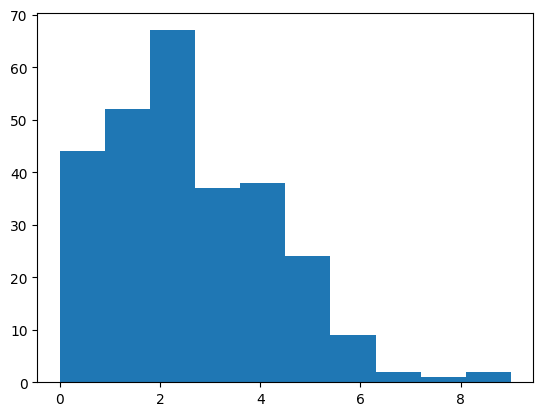

Columna: PTS


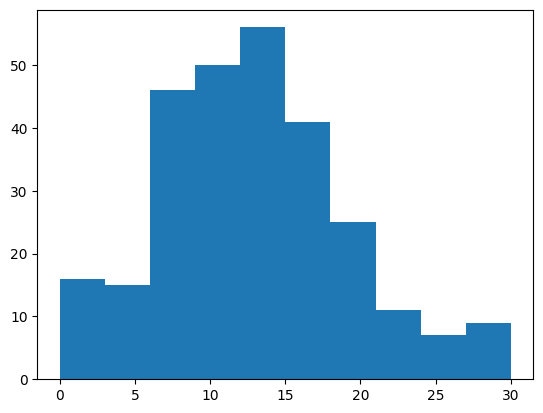

Columna: PTB


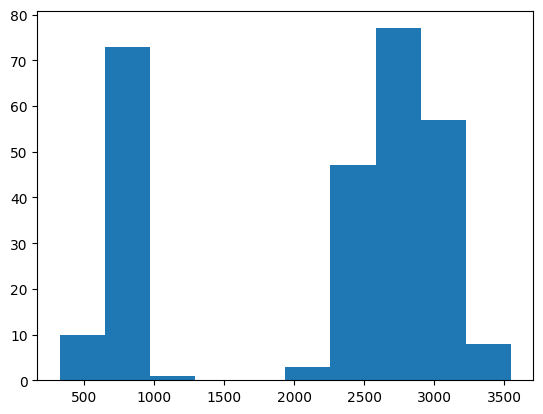

Columna: PTB_scaled


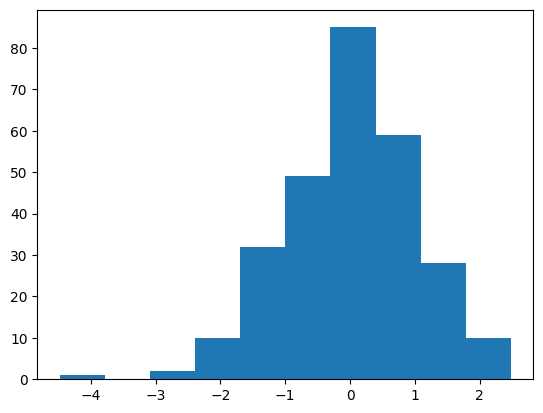

Columna: BG_scaled


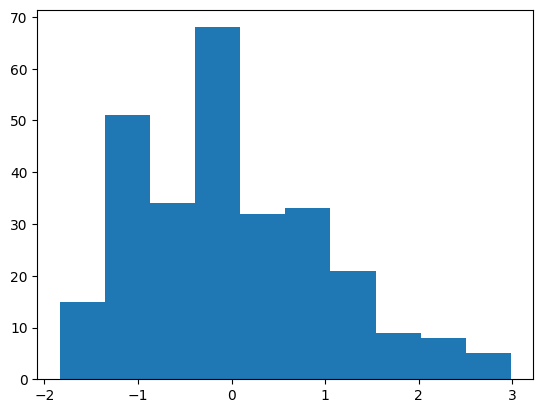

Columna: PTS_scaled


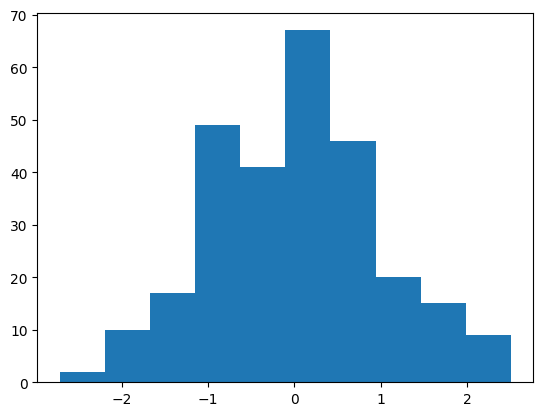

In [93]:
for column in fms_scaled.columns:
    if fms_scaled[column].dtype != np.float64 and fms_scaled[column].dtype != np.int64:
        continue
    print(f'Columna: {column}')
    plt.hist(fms_scaled[column])
    plt.show()
